#### Importing all  important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#### loading the dataset using pandas

In [2]:
data=pd.read_csv(r'baseball.csv')
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [4]:
data.columns.value_counts().sum()

17

so we have 17 columns

In [5]:
#checking the shape of dataset
data.shape

(30, 17)

#### checking the null values

In [6]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

#### checking with the help of heatmap

<AxesSubplot:>

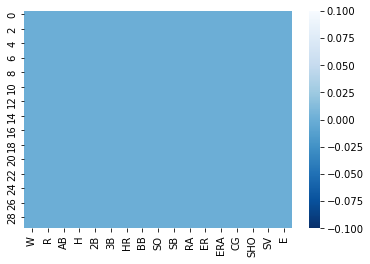

In [7]:
sns.heatmap(data.isnull(),cmap= 'Blues_r')

we find that we don't have any null value in dataset

#### Exploratory Data Analysis

In [8]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


#### Exploration of the dataset

#### Bivariate analysis

<AxesSubplot:xlabel='W', ylabel='R'>

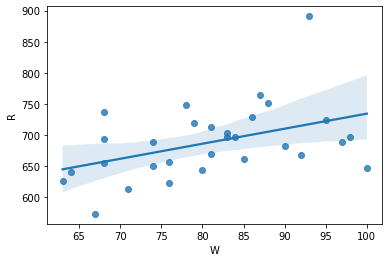

In [10]:
sns.regplot(data=data, x='W', y ='R')

<AxesSubplot:xlabel='W', ylabel='AB'>

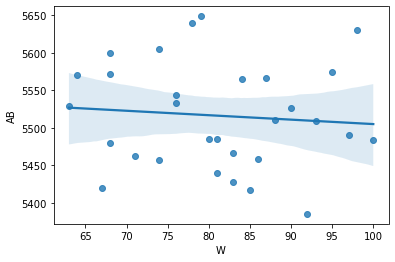

In [11]:
sns.regplot(data=data, x='W', y='AB')

<AxesSubplot:xlabel='W', ylabel='H'>

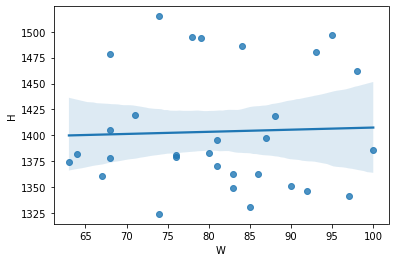

In [12]:
sns.regplot(data=data, x= 'W', y= 'H')

<AxesSubplot:xlabel='W', ylabel='2B'>

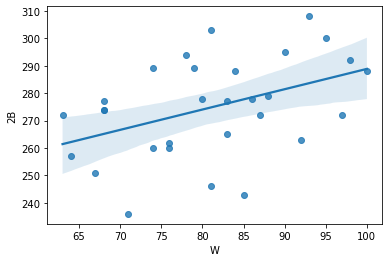

In [13]:
sns.regplot(data=data, x= 'W', y='2B')

<AxesSubplot:xlabel='W', ylabel='3B'>

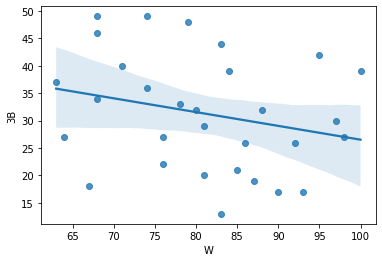

In [14]:
sns.regplot(data=data, x= 'W', y='3B')

<AxesSubplot:xlabel='W', ylabel='HR'>

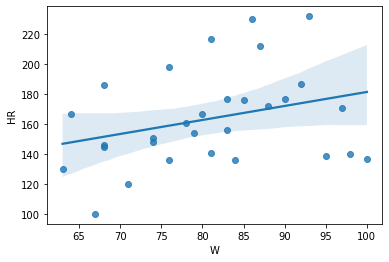

In [15]:
sns.regplot(data=data, x= 'W', y='HR')

<AxesSubplot:xlabel='W', ylabel='BB'>

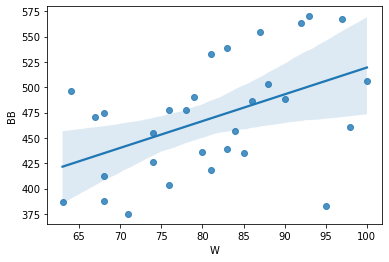

In [16]:
sns.regplot(data=data, x= 'W', y= 'BB')

<AxesSubplot:xlabel='W', ylabel='SO'>

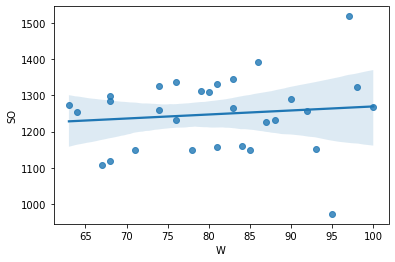

In [17]:
sns.regplot(data= data, x='W', y='SO')

<AxesSubplot:xlabel='W', ylabel='SB'>

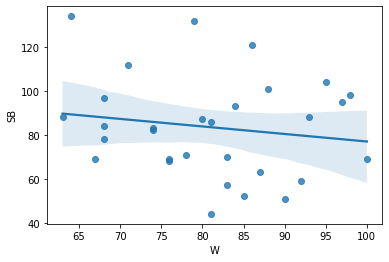

In [18]:
sns.regplot(data= data , x='W', y='SB')

<AxesSubplot:xlabel='W', ylabel='RA'>

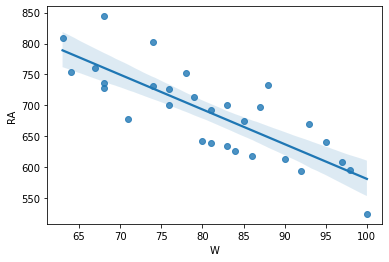

In [19]:
sns.regplot(data= data, x='W', y='RA')

<AxesSubplot:xlabel='W', ylabel='ER'>

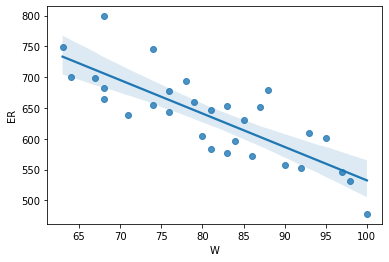

In [20]:
sns.regplot(data=data, x='W', y= 'ER')

<AxesSubplot:xlabel='W', ylabel='ERA'>

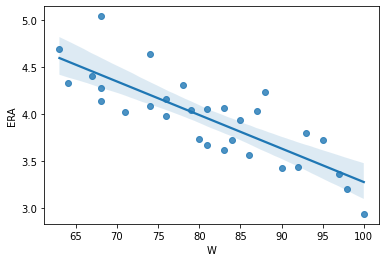

In [21]:
sns.regplot(data=data , x= 'W', y='ERA')

<AxesSubplot:xlabel='W', ylabel='CG'>

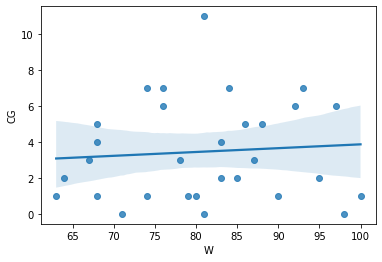

In [22]:
sns.regplot(data=data, x='W', y='CG')

<AxesSubplot:xlabel='W', ylabel='SHO'>

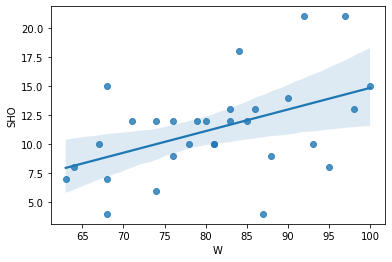

In [23]:
sns.regplot(data=data, x= 'W', y='SHO')

<AxesSubplot:xlabel='W', ylabel='SV'>

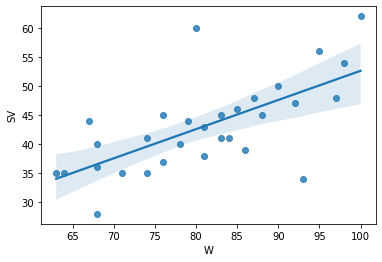

In [24]:
sns.regplot(data=data, x='W', y='SV')

<AxesSubplot:xlabel='W', ylabel='E'>

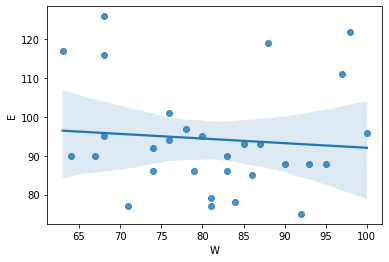

In [25]:
sns.regplot(data=data, x='W', y='E')

#### Multivariate analysis

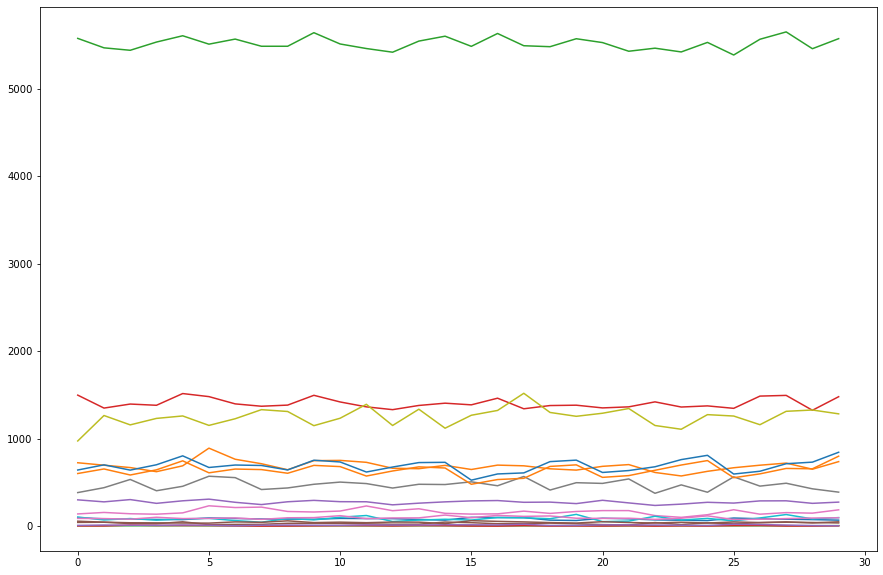

In [26]:
plt.figure(figsize=(15,10))
plt.plot(data)

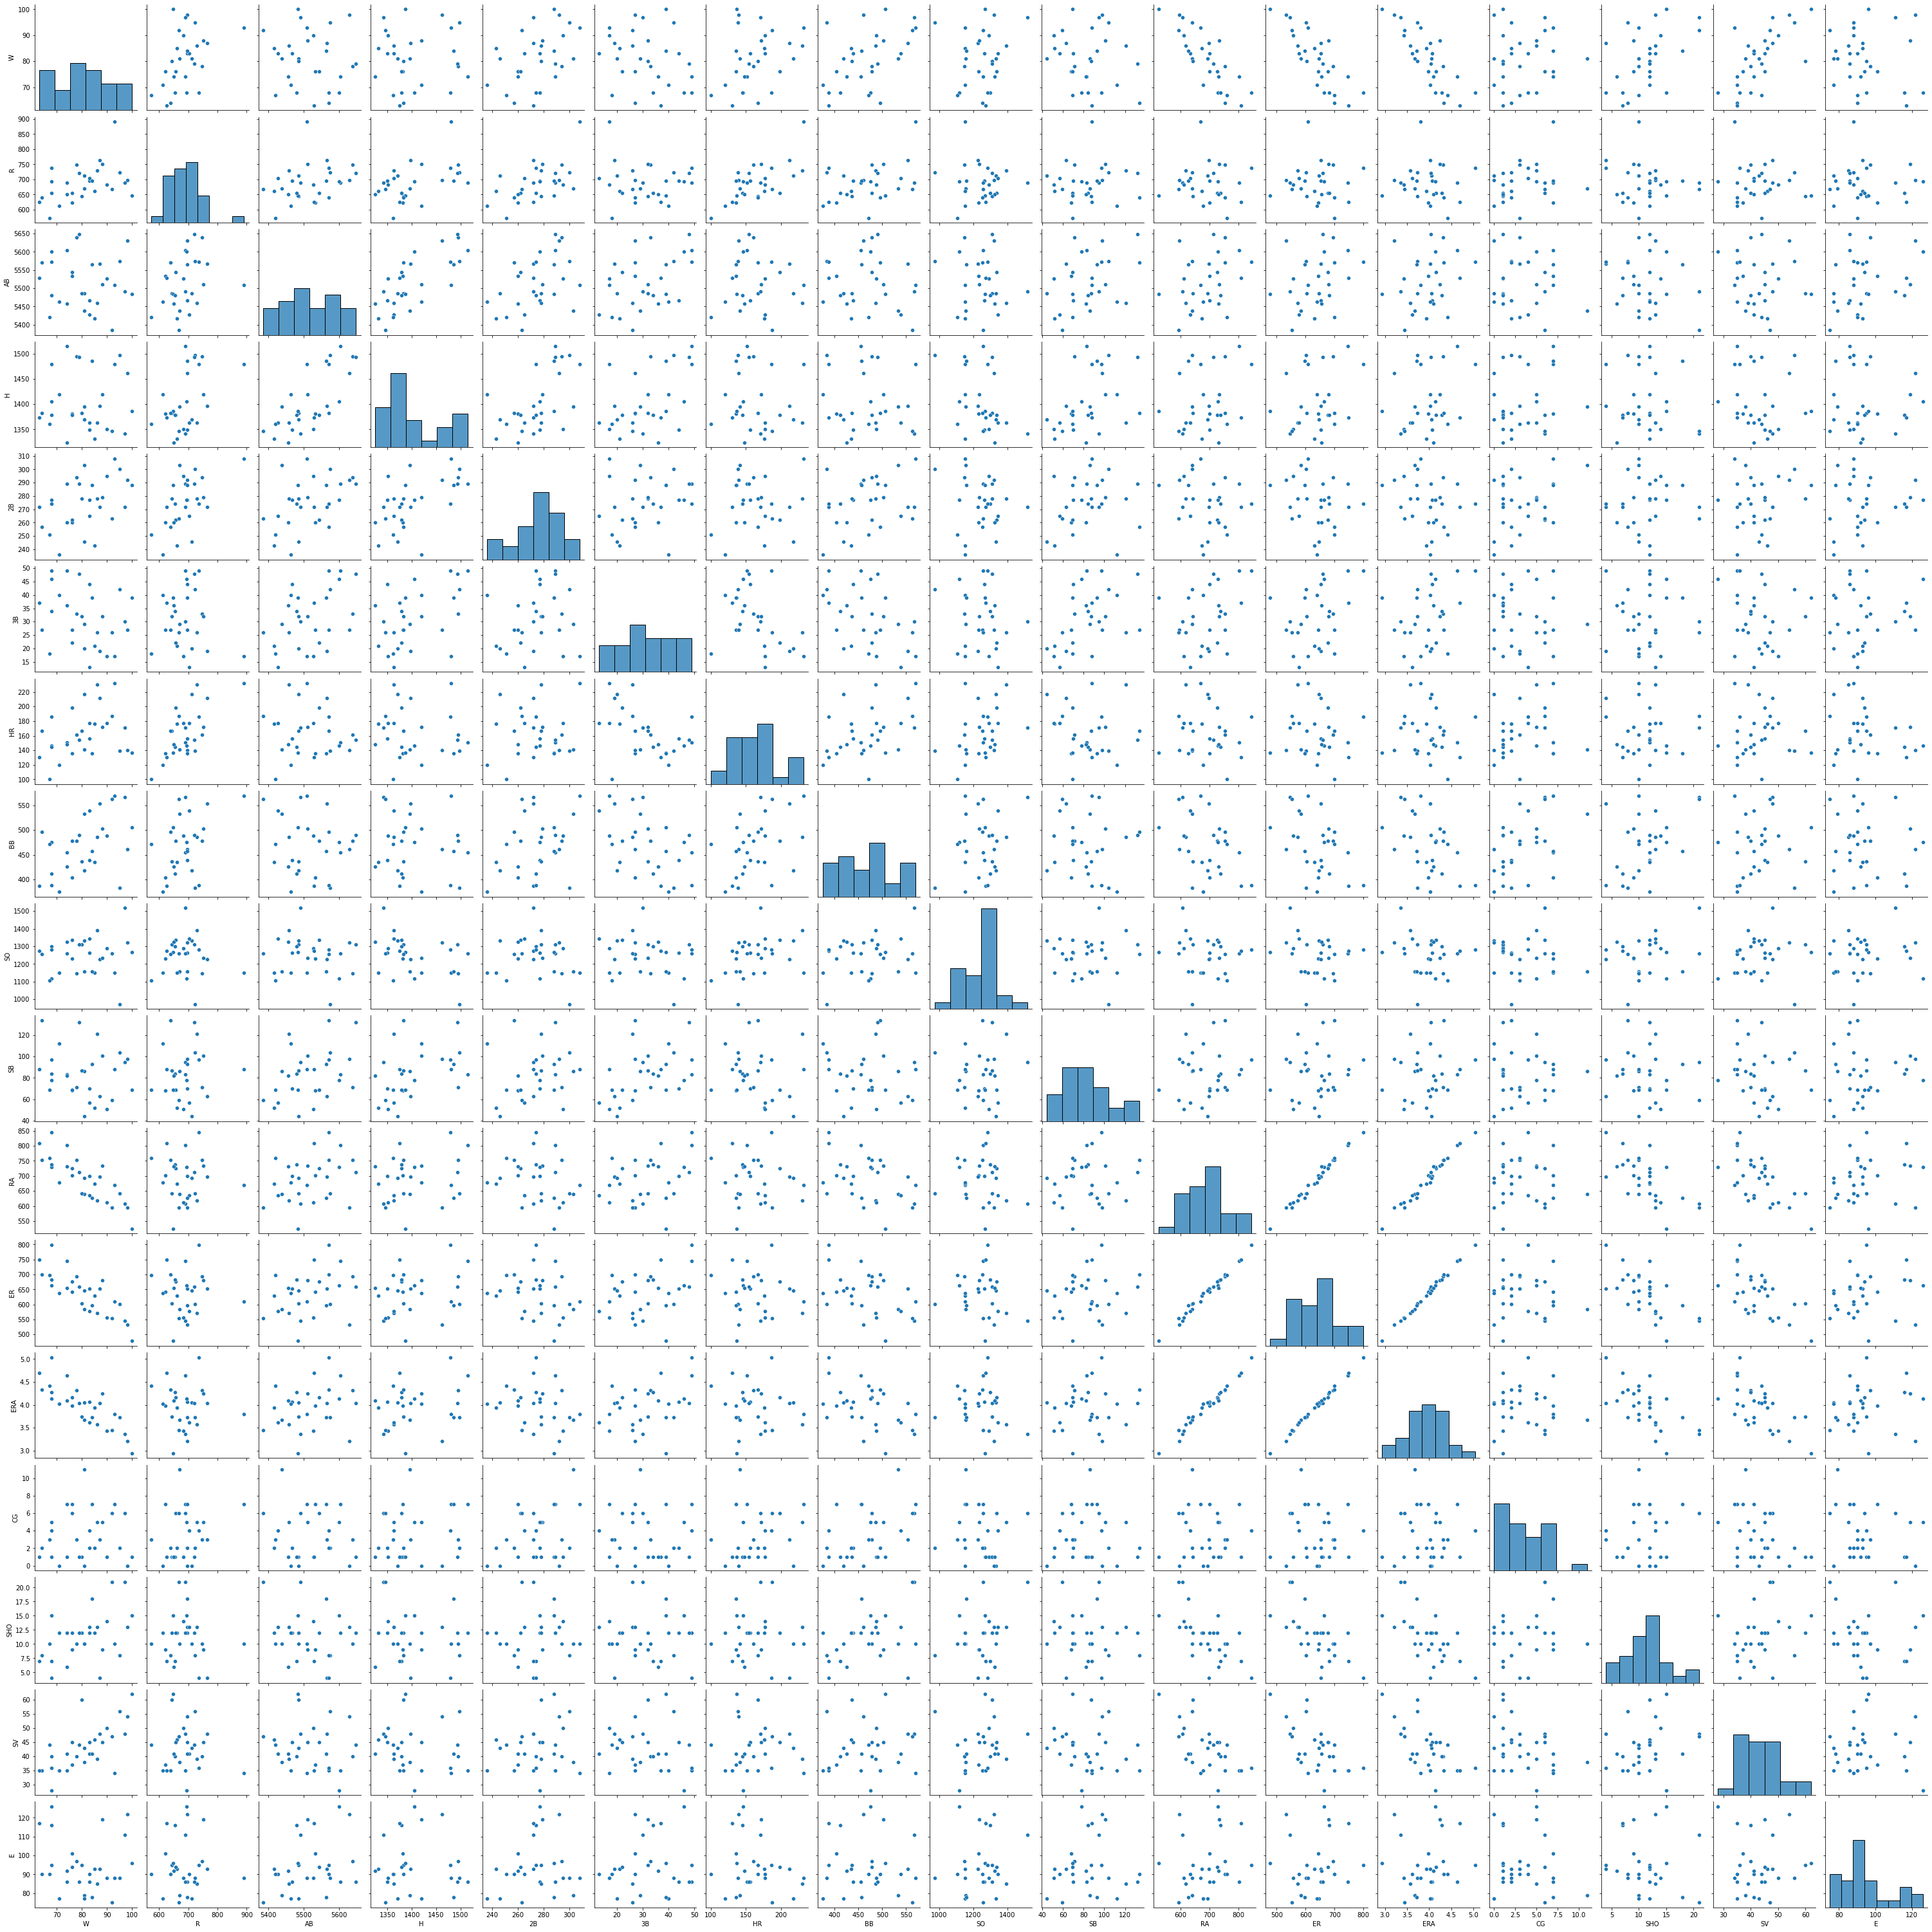

In [27]:
sns.pairplot(data, palette='Set1')

In [28]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Here we can see that the standard is very high means the data is much spreaded here , there are might be the chances that the datset may contaon outliers and also skewness

#### Correlation Analysis

In [29]:
dfcor=data.corr()
dfcor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


#### Showing the heatmap with the correlation

<AxesSubplot:>

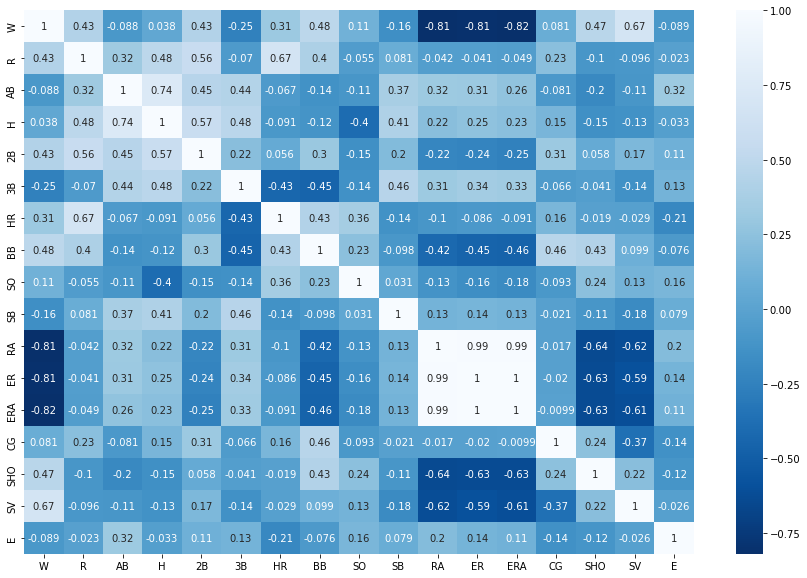

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap='Blues_r',annot=True)

#### Covraince Analysis

In [31]:
data.cov()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,109.274713,264.594253,-64.783908,22.466667,80.921839,-27.437931,102.263218,288.865517,121.317241,-37.500000,-612.785057,-593.488506,-3.890471,2.326437,20.320690,54.829885,-13.057471
R,264.594253,3452.943678,1322.832184,1621.285057,595.547126,-43.037931,1255.295402,1349.251724,-333.668966,109.086207,-176.366667,-169.994253,-1.314977,37.680460,-25.003448,-44.567816,-19.080460
AB,-64.783908,1322.832184,4965.650575,2976.128736,578.108046,320.710345,-150.209195,-548.441379,-775.193103,599.068966,1605.728736,1530.666667,8.177218,-15.749425,-57.289655,-58.983908,311.563218
H,22.466667,1621.285057,2976.128736,3265.085057,586.112644,285.903448,-165.211494,-385.606897,-2364.627586,539.000000,924.285057,1011.954023,5.998230,23.363218,-34.268966,-58.622989,-26.459770
2B,80.921839,595.547126,578.108046,586.112644,327.443678,41.703448,32.416092,312.510345,-283.048276,80.517241,-284.659770,-298.942529,-2.094115,15.335632,4.324138,24.432184,26.712644
3B,-27.437931,-43.037931,320.710345,285.903448,41.703448,109.251724,-143.334483,-271.306897,-153.131034,109.086207,236.755172,249.431034,1.570793,-1.903448,-1.782759,-11.710345,18.482759
HR,102.263218,1255.295402,-150.209195,-165.211494,32.416092,-143.334483,1012.722989,772.900000,1188.455172,-99.155172,-238.428736,-191.787356,-1.313805,13.763218,-2.506897,-7.147126,-92.218391
BB,288.865517,1349.251724,-548.441379,-385.606897,312.510345,-271.306897,772.900000,3255.127586,1383.186207,-128.017241,-1713.265517,-1811.465517,-11.913069,72.917241,100.141379,44.648276,-60.275862
SO,121.317241,-333.668966,-775.193103,-2364.627586,-283.048276,-153.131034,1188.455172,1383.186207,10766.027586,73.310345,-970.737931,-1176.172414,-8.498207,-26.786207,101.627586,103.124138,224.689655
SB,-37.500000,109.086207,599.068966,539.000000,80.517241,109.086207,-99.155172,-128.017241,73.310345,520.534483,217.637931,228.948276,1.306034,-1.310345,-10.017241,-32.931034,25.206897


<AxesSubplot:>

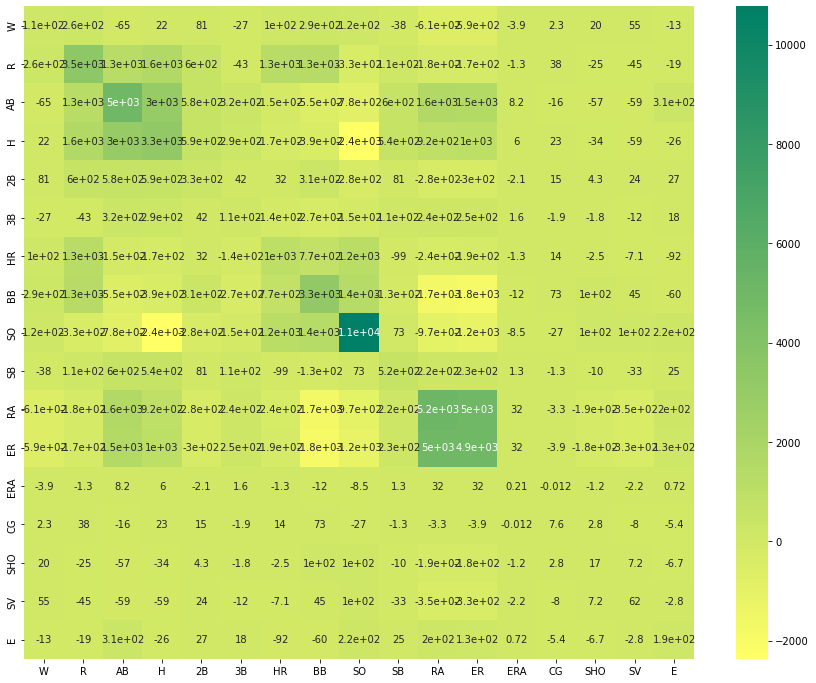

In [32]:
plt.figure(figsize=(15,12))
sns.heatmap(data.cov(),annot=True, cmap='summer_r')

#### Checking for the Outliers

<AxesSubplot:>

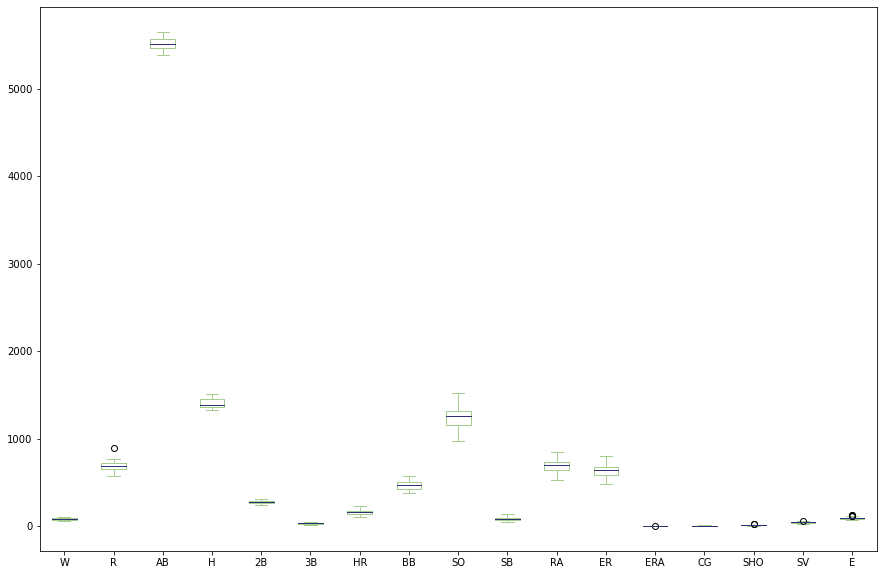

In [33]:
data.plot(kind='box', cmap='crest', figsize=(15,10))

So we can see that R , ERA, SHO, SV and E has the some of the outliers

<AxesSubplot:xlabel='R'>

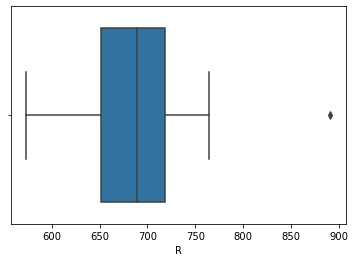

In [34]:
sns.boxplot(data=data, x='R')

<AxesSubplot:xlabel='SHO'>

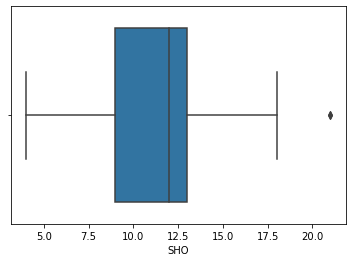

In [35]:
sns.boxplot(data=data, x='SHO', orient='v')

<AxesSubplot:xlabel='ERA'>

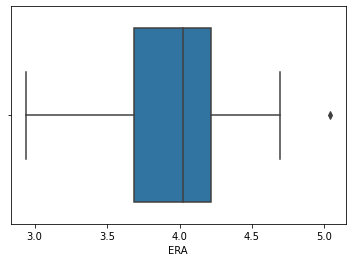

In [36]:
sns.boxplot(data=data, x='ERA')

<AxesSubplot:xlabel='E'>

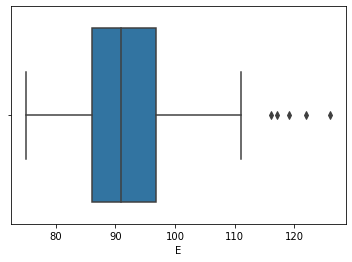

In [37]:
sns.boxplot(data=data, x='E')

E has the max of the outliers

#### Checking for the skewness in the Dataset

In [38]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

So we can see that some of the columns are very highly skewed data cols

#### Data Cleaning
#### Removing the Outliers

In [39]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print('this is old  data:',data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print('this is new_data:',data_final.shape)

this is old  data: (30, 17)
this is new_data: (29, 17)


In [40]:
data_final.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [41]:
# Let's check the the data loss
data_loss = (30-29)/30*100
data_loss

3.3333333333333335

#### Splitting into x and y

In [42]:
x =data_final.drop(['W'], axis=1)
y = data_final.iloc[:,0]

In [43]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

#### Transforming & removing the skewness

In [44]:
from sklearn.preprocessing  import power_transform
x=power_transform(x,method='yeo-johnson')

In [45]:
x

array([[ 9.62543504e-01,  8.38257983e-01,  4.16333634e-16,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -6.60978697e-01, -5.08052224e-01, -5.09292146e-01,
        -3.07098204e-01, -7.87002186e-01,  1.53275292e+00,
        -3.48265262e-01],
       [ 2.98863300e-01, -6.92877447e-01, -2.49800181e-16,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
         1.60225829e-01,  2.35800488e-01,  2.41440214e-01,
        -3.07098204e-01,  2.36736538e-01,  3.12020186e-01,
        -5.40819806e-01],
       [-3.12105130e-01, -1.11045984e+00,  0.00000000e+00,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
        -6.74967476e-01, -7.52213881e-01, -6.42097599e-01,
         2.01131531e+00, -2.52844176e-01, -6.64136739e-01,
        -1.32612477e+00],
       [-1.30829774e+00,  2.59829043e

In [46]:
#Lets Again Check the Skewness
x= pd.DataFrame(x)

In [47]:
x.skew()

0    -0.024842
1     0.081092
2     0.000000
3    -0.052793
4    -0.075139
5     0.000448
6    -0.008572
7     0.051530
8    -0.009570
9    -0.011974
10   -0.004988
11   -0.000401
12   -0.045947
13    0.000529
14   -0.000925
15    0.065585
dtype: float64

So as now we can see that the skewness is fully being removed from the dataset

#### ploting all the Normal distribution plots

<Figure size 1008x720 with 0 Axes>

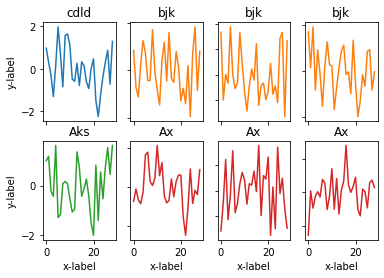

In [48]:
plt.figure(figsize=(14,10))
fig, axs = plt.subplots(2,4)
axs[0, 0].plot(x[0])
axs[0, 0].set_title('cdld')
axs[0, 1].plot(x[1], 'tab:orange')
axs[0, 1].set_title('bjk')
axs[0, 2].plot(x[2], 'tab:orange')
axs[0, 2].set_title('bjk')
axs[0, 3].plot(x[3], 'tab:orange')
axs[0, 3].set_title('bjk')

axs[1, 0].plot(x[4], 'tab:green')
axs[1, 0].set_title('Aks')
axs[1, 1].plot(x[5], 'tab:red')
axs[1, 1].set_title('Ax')
axs[1, 2].plot(x[6], 'tab:red')
axs[1, 2].set_title('Ax')
axs[1, 3].plot(x[7], 'tab:red')
axs[1, 3].set_title('Ax')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

#### Plotting Displot Through Iteration

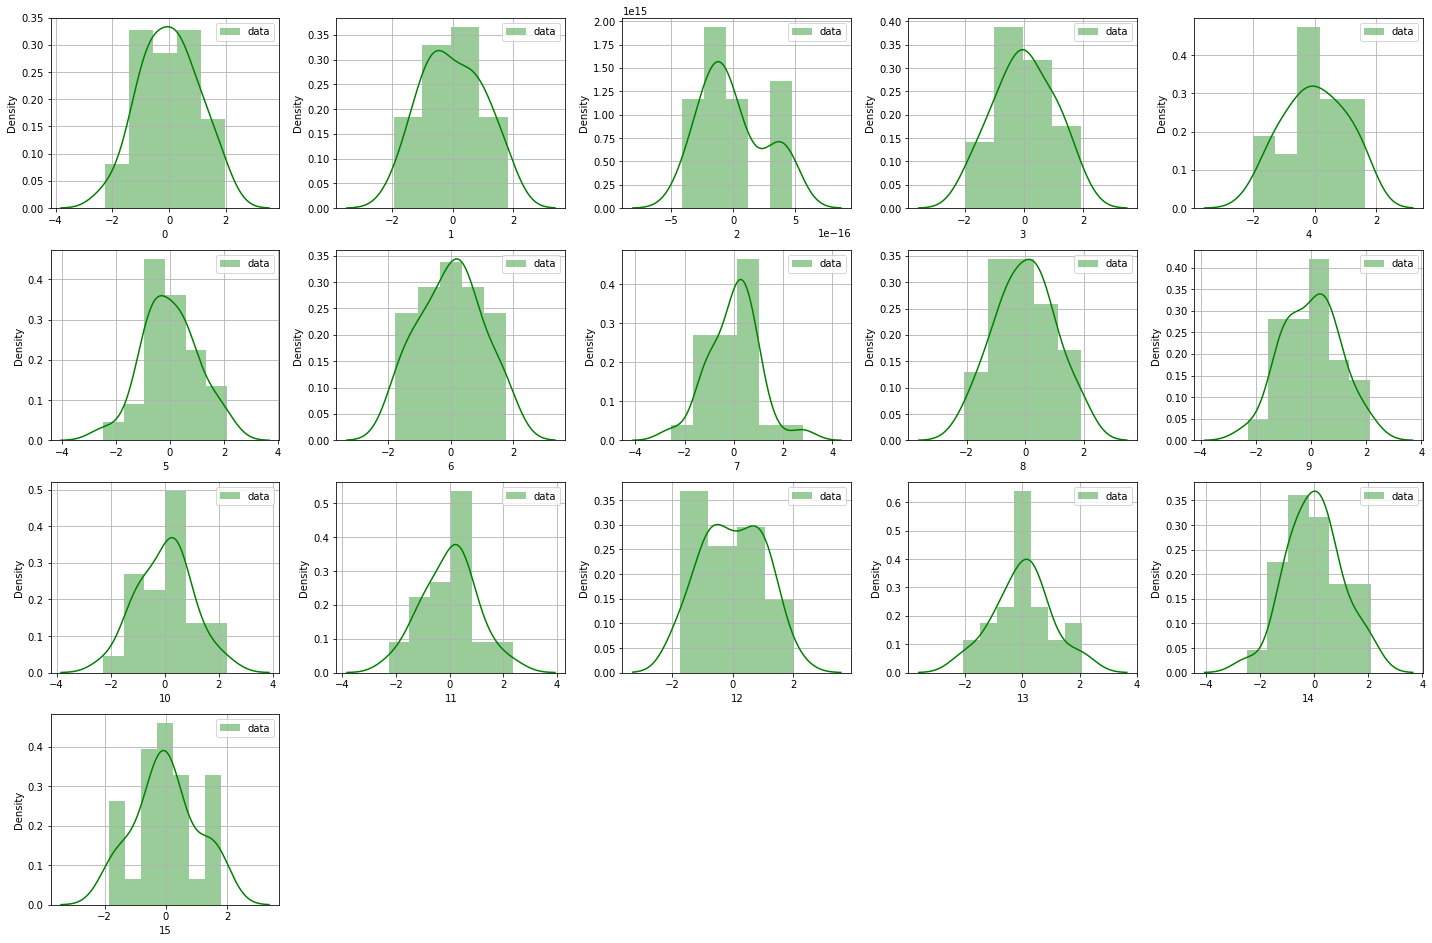

In [49]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(x.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(x[col],color='g',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

#### Data preprocessing
#### Feature engineering & feature extraction
using the Variance threshold method

In [50]:
from sklearn.feature_selection import VarianceThreshold
# we are importing the sklearn's feature selection technique here to extract some imp feature from the model
var_thres = VarianceThreshold(threshold=0.0)
var_thres.fit(x)

VarianceThreshold()

In [51]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [52]:
x.columns[var_thres.get_support()]

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')

This says us that leaving 1,2 number column all are important thus we can drop them

In [53]:
# taking out all the constant columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_thres.get_support()]]
print(len(cons_columns))

0


In [54]:
#dropping the column 1 and 2 
x.drop([1,2],axis=1, inplace=True)

In [55]:
x.head()

,0,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.962544,1.685188,1.006150,-0.741927,-1.605198,-2.550612,0.936132,-0.660979,-0.508052,-0.509292,-0.307098,-0.787002,1.532753,-0.348265
1,0.298863,0.138198,1.185227,-0.109958,-0.462096,0.093683,-0.516377,0.160226,0.235800,0.241440,-0.307098,0.236737,0.312020,-0.540820
2,-0.312105,1.907385,-0.228819,-0.664354,1.232098,-0.935611,0.225038,-0.674967,-0.752214,-0.642098,2.011315,-0.252844,-0.664137,-1.326125
3,-1.308298,-0.837665,-0.432228,-0.860039,-1.162721,-0.230683,-0.618422,0.174077,0.093091,0.043013,1.264463,-0.513555,-0.820689,0.650818
4,0.137737,0.911435,1.622636,-0.289647,-0.155686,0.044143,0.095038,1.575971,1.555853,1.493491,1.264463,0.236737,-1.149165,-0.540820


so we removed the columns for the better model buiding

#### checking for the VIF

In [56]:
import numpy as np
import pandas  as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
def  calcvif(x):
    vif =pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [58]:
x = x.iloc[:,:-1]
calcvif(x) 

,variables,VIF factor
0,0,3.652063
1,3,2.757762
2,4,2.949272
3,5,5.815040
4,6,3.087869
5,7,2.913134
6,8,2.056055
7,9,163.344221
8,10,599.761533
9,11,317.649419


As we can se that the 9 , 10, 11 variables has the max VIF so we need to drop it one by one

In [59]:
x.drop([10], axis=1,inplace=True)

as for now we have dropped the highest VIF

In [60]:
x = x.iloc[:,:-1]
calcvif(x)

,variables,VIF factor
0,0,3.574143
1,3,2.526846
2,4,2.905625
3,5,4.346635
4,6,2.974961
5,7,2.395374
6,8,1.606359
7,9,63.133012
8,11,70.146460
9,12,1.860265


#### Splitting the Data into train & test
Choosing the best Random state

In [61]:
from sklearn.metrics import r2_score, mean_squared_error

In [62]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8096303249097473 on random_state: 99


In [63]:
x_train.shape

(22, 11)

In [64]:
y_train.shape

(22,)

In [65]:
#doing train test split
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.22, random_state=99)

#### Using the linear Regression model

In [66]:
#Checking R2 score for Random Forest Regressor
lr= LinearRegression()
lr.fit(x_train,y_train)

#prediction
predlr= lr.predict(x_test)
print('R2_Score:',r2_score(y_test,predlr))
print('Mean abs error:',mean_absolute_error(y_test, predlr))
print('Mean squared error:',mean_squared_error(y_test, predlr))

R2_Score: 0.49337908118546114
Mean abs error: 6.927202248952814
Mean squared error: 68.73501771998072


In [67]:
lr.intercept_

80.15943909299116

In [68]:
lr.coef_

array([  5.88807934,  -0.39951101,   0.59857919,   0.84159064,
        -2.70171708,   0.92538591,  -0.25660805,  -1.26841104,
       -10.20381211,   1.60370665,  -0.83895666])

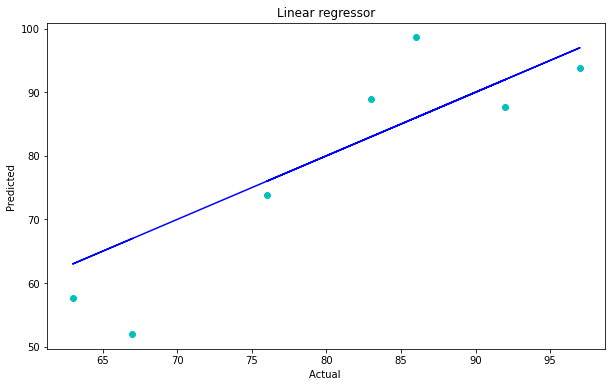

In [69]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predlr,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual ")
plt.ylabel("Predicted ")
plt.title("Linear regressor")
plt.show()

#### Random forest Regressor

In [70]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=99, max_depth=4, bootstrap=True, verbose=1)
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('Mean abs error:',mean_absolute_error(y_test, predRFR))
print('Mean squared error:',mean_squared_error(y_test, predRFR))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


R2_Score: 0.8105996532470762
Mean abs error: 4.333922052814911
Mean squared error: 25.69660214721302


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished


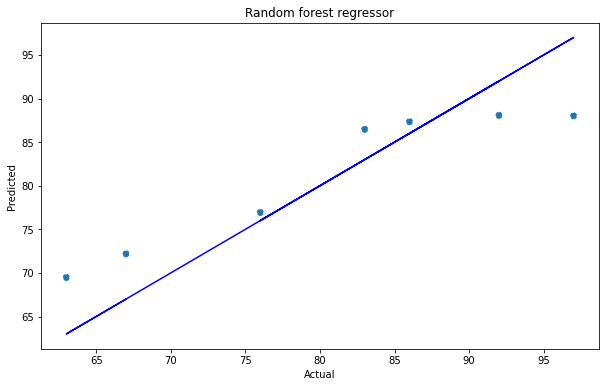

In [71]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predRFR,cmap='Set1', linestyle='--')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random forest regressor")
plt.show()

#### Using the KNN Regressor

In [72]:
#Checking R2 score for KNN regressor
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=6, weights='uniform')
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('Mean abs error:',mean_absolute_error(y_test, predknn))
print('Mean squared error:',mean_squared_error(y_test, predknn))

R2_Score: 0.7011966840486696
Mean abs error: 5.428571428571429
Mean squared error: 40.539682539682545


Text(0.5, 1.0, 'K-nearest neighbors regressor')

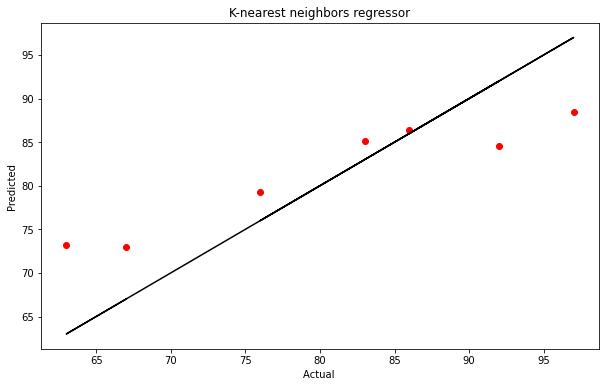

In [73]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predknn,color='r')
plt.plot(y_test,y_test,color='black')
plt.xlabel("Actual ")
plt.ylabel("Predicted")
plt.title("K-nearest neighbors regressor")

#### Using Support Vector regressor

In [74]:
#Checking R2 score for svr
from sklearn.svm import SVR
sv= SVR(kernel='linear', max_iter=300)
sv.fit(x_train,y_train)

#Prediction
predsv=sv.predict(x_test)
print('R2_Score:',r2_score(y_test,predsv))
print('Mean abs error:',mean_absolute_error(y_test, predsv))
print('Mean squared error:',mean_squared_error(y_test, predsv))

R2_Score: 0.8052141057718474
Mean abs error: 3.679815152936913
Mean squared error: 26.42727805772977


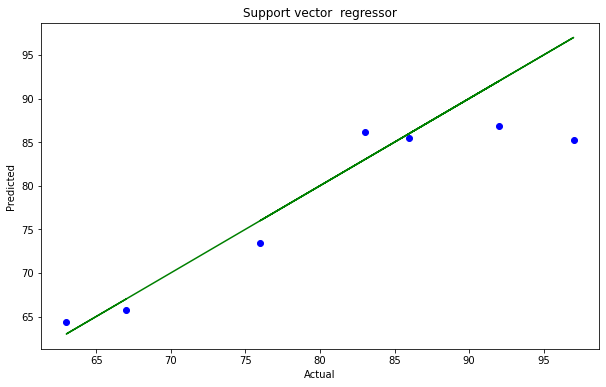

In [75]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predsv,color='b')
plt.plot(y_test,y_test,color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted ")
plt.title("Support vector  regressor")
plt.show()

#### Gradient Boosting Regressor


In [76]:
#Checking R2 score for svr
from sklearn.ensemble import GradientBoostingRegressor
Gb= GradientBoostingRegressor(n_estimators=600,  random_state=99, learning_rate=1, max_depth=4)
Gb.fit(x_train,y_train)

#prediction
predGb=Gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predGb))
print('Mean abs error:',mean_absolute_error(y_test, predGb))
print('Mean squared error:',mean_squared_error(y_test, predGb))

R2_Score: 0.5767173643710103
Mean abs error: 6.787939153439154
Mean squared error: 57.428223707378045


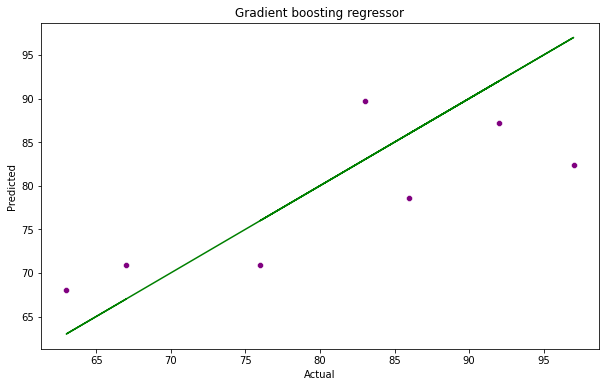

In [77]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=predGb,color='purple')
plt.plot(y_test,y_test,color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Gradient boosting regressor")
plt.show()

so till now we can see that Random forest regrresor is performing the best with a R2 score of 81 % which is the highest thus still there are chances that- the models are Overfitted so we have to perform the cross validation

#### Cross validation of each model


In [78]:
from sklearn.model_selection import cross_val_score

#### Linear Regression

In [79]:
cross_val_score(lr,x,y,cv=7).mean()

0.23914028843725768

#### Random forest Regressor

In [80]:
cross_val_score(RFR,x,y,cv=7).mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

-0.17066491789357094

#### Knn regressor

In [81]:
cross_val_score(knn,x,y,cv=7).mean()

0.1544593407809951

#### SVR Regression

In [82]:
cross_val_score(sv,x,y,cv=7).mean()

0.4253732497927838

#### Gradient boosting

In [83]:
cross_val_score(Gb,x,y,cv=7).mean()

-1.4569245307315202

#### Hyperparameter tuning
#### Grid Search CV in Support Vector Regressor


In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import numpy as np
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = SVR()
grs = GridSearchCV(svr, parameters,refit = True, verbose = 3)
grs.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear;, score=0.763 total time=   0.0s
[CV 2/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear;, score=-0.043 total time=   0.0s
[CV 3/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear;, score=0.582 total time=   0.0s
[CV 4/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear;, score=0.411 total time=   0.0s
[CV 5/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear;, score=0.071 total time=   0.0s
[CV 1/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf;, score=-0.391 total time=   0.0s
[CV 2/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf;, score=-0.272 total time=   0.0s
[CV 3/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf;, score=-0.757 total time=   0.0s
[CV 4/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf;, score=-0.300 total time=   0.0s
[CV 5/5] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf;, score=-0.006 total time=   0.0s
[CV 1/5] END C=1.

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1.5, 10], 'epsilon': [0.1, 0.2, 0.5, 0.3],
                         'gamma': [1e-07, 0.0001],
                         'kernel': ('linear', 'rbf', 'poly')},
             verbose=3)

In [85]:
grs.best_params_

{'C': 1.5, 'epsilon': 0.3, 'gamma': 1e-07, 'kernel': 'linear'}

In [86]:
Best_mod = SVR(C=1.5, epsilon= 0.3, gamma= 1e-07, kernel= 'linear')
Best_mod.fit(x_train, y_train)

SVR(C=1.5, epsilon=0.3, gamma=1e-07, kernel='linear')

In [87]:
svrpred = Best_mod.predict(x_test)

acc = r2_score(y_test,svrpred)
print(acc*100)

76.14721570139015


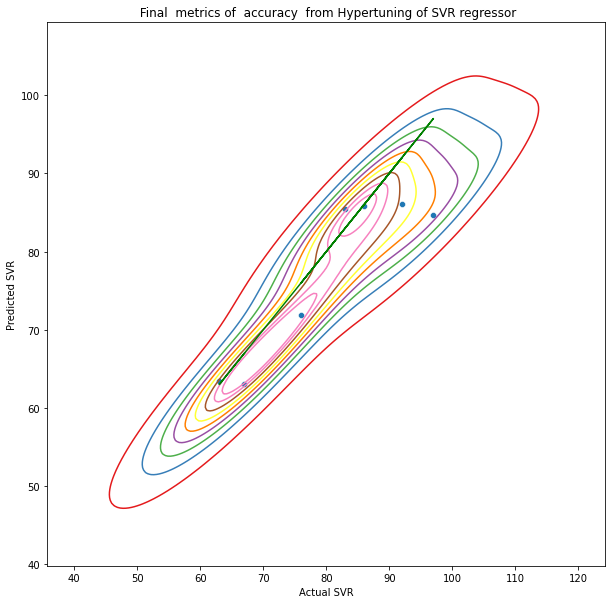

In [88]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=svrpred,palette='Set2')
sns.kdeplot(x=y_test,y=svrpred, cmap='Set1')
plt.plot(y_test,y_test,color='g')
plt.xlabel("Actual SVR")
plt.ylabel("Predicted SVR")
plt.title(" Final  metrics of  accuracy  from Hypertuning of SVR regressor")
plt.show()

We got 76 accuracy from the Support vector regressor

#### Hypertuning on Random Forest Regressor

In [89]:
RFR =RandomForestRegressor()

In [90]:
parameter = {'n_estimators':[200,300,400,600],
'random_state':[80,99,100,150,110],
 'max_depth':[1,2,3,4],
 'max_samples':[0.1,0.01,0.001,1],
 'max_features':['log','sqrt']}      

In [91]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=7,n_jobs = 3,verbose = 2)

In [92]:
GridCV.fit(x_train,y_train)

Fitting 7 folds for each of 640 candidates, totalling 4480 fits


GridSearchCV(cv=7, estimator=RandomForestRegressor(), n_jobs=3,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'max_features': ['log', 'sqrt'],
                         'max_samples': [0.1, 0.01, 0.001, 1],
                         'n_estimators': [200, 300, 400, 600],
                         'random_state': [80, 99, 100, 150, 110]},
             verbose=2)

In [93]:
GridCV.best_params_

{'max_depth': 1,
 'max_features': 'sqrt',
 'max_samples': 0.1,
 'n_estimators': 300,
 'random_state': 110}

In [94]:
Best_mod2 = RandomForestRegressor(n_estimators=600,max_features='sqrt',random_state= 99, max_depth= 4, max_samples = 0.1)
Best_mod2.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, max_features='sqrt', max_samples=0.1,
                      n_estimators=600, random_state=99)

In [95]:
rfrpred = Best_mod2.predict(x_test)

acc = r2_score(y_test,rfrpred)
print(acc*100)

14.309257587912827


So we can see that the SVR is giving the best prediction after Hypertuning which is 76% so we are taking as our final model

#### Saving the Predictive Model

In [96]:
import joblib
joblib.dump(Best_mod,"BestModelbase.pkl")
#dumping to the local system for any cloud deployment further

['BestModelbase.pkl']

#### Conclusion and the prediction by the model

In [97]:
import numpy as np
a = np.array(y_test)
predicted = np.array(Best_mod.predict(x_test))
Base_mdl = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
Base_mdl

,Original,Predicted
0,67,63.125123
1,63,63.424132
2,97,84.658761
3,76,71.863627
4,83,85.460511
5,92,86.013324
6,86,85.830949


Text(0.5, 1.0, 'Original vs Predicted Graph')

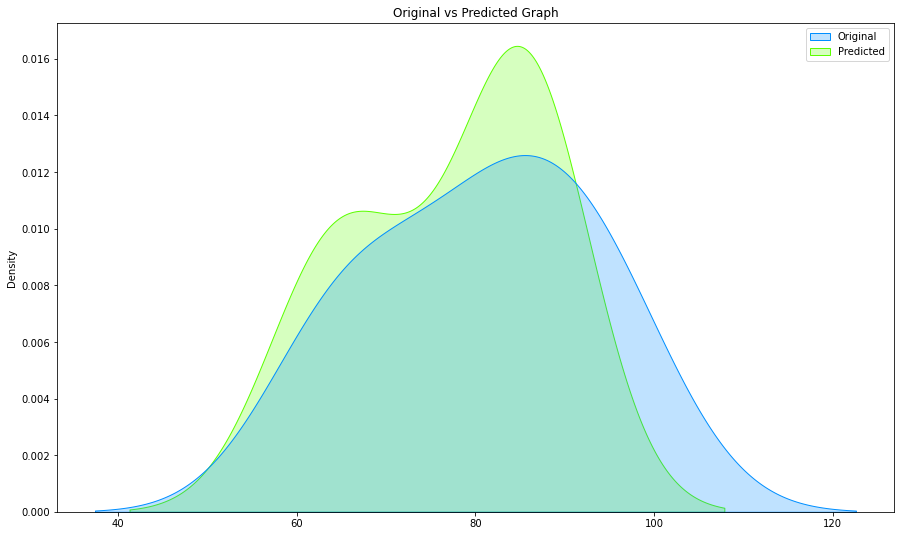

In [101]:
plt.figure(figsize=(15,9))
sns.kdeplot(data=Base_mdl, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs Predicted Graph')

### ThankYou!!!